In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import helper_functions as hf


[Match(sport='basketball', start=Timestamp('2024-04-29 17:30:00'), duration=datetime.timedelta(seconds=2700), subteam_a=Subteam(sport='basketball', main_team_letter='A', sub_key='1', players=['Failing Muskrat', 'Ill-fated Meerkat', 'Awesome Wolverine', 'Clumsy Lizard', 'Overjoyed Tapir']), subteam_b=Subteam(sport='basketball', main_team_letter='B', sub_key='1', players=['Gargantuan Okapi', 'Ideal Vaquita', 'Ignorant Lemur', 'Revolving Coelacanth', 'Frail Skunk']), location=1, result=nan, winner=nan), Match(sport='basketball', start=Timestamp('2024-04-29 18:15:00'), duration=datetime.timedelta(seconds=2700), subteam_a=Subteam(sport='basketball', main_team_letter='B', sub_key='1', players=['Gargantuan Okapi', 'Ideal Vaquita', 'Ignorant Lemur', 'Revolving Coelacanth', 'Frail Skunk']), subteam_b=Subteam(sport='basketball', main_team_letter='C', sub_key='1', players=['Damaged Fly', 'Scientific Angelfish', 'Real Mouse', 'Alarmed Bird', 'Blank Tiffany']), location=1, result=nan, winner=nan), 

## Load and sanitize dataframe

In [4]:
df = hf.get_players()

print(f"{len(df)} entries, of which {np.sum(~df.is_postdoc)} are PhDs and {np.sum(df.is_postdoc)} are postdocs")
df.head(5)
# Conflicting sports
# np.sum(df["volleyball"] & df["basketball"])
# np.sum(df["football"] & df["tennis"])
# df[df["capture_the_flag"] & df["spikeball"]]["nickname"].tolist()


90 entries, of which 70 are PhDs and 20 are postdocs


,nickname,institute,is_postdoc,avail_monday,avail_tuesday,avail_thursday,avail_friday,wants_basketball,basketball,wants_running_sprints,...,subteam_chess,subteam_football,subteam_tennis,subteam_capture_the_flag,subteam_spikeball,subteam_beer_pong,subteam_foosball,subteam_ping_pong,num_sports_attending,attendance_ratio
0,Magnificent Barracuda,MPE,False,True,True,True,True,False,False,True,...,NaN,1,2,R,2,3,2,7,8,0.888889
1,Animated Yak,MPE,False,True,True,True,True,False,False,False,...,NaN,1,R,R,3,2,3,2,6,0.750000
2,Failing Muskrat,IPP,False,True,True,True,True,True,True,False,...,NaN,1,R,1,NaN,NaN,NaN,6,4,0.666667
3,Nutty Sheep,MPE,False,True,False,True,True,False,False,True,...,NaN,NaN,NaN,1,R,NaN,NaN,14,4,0.800000
4,Excited Rabbit,IPP,False,True,True,False,False,True,True,False,...,2,1,NaN,NaN,NaN,NaN,NaN,16,3,0.600000


,nickname,num_sports_not_avail,wants_basketball,basketball,wants_running_sprints,running_sprints,wants_volleyball,volleyball,wants_chess,chess,...,wants_capture_the_flag,capture_the_flag,wants_spikeball,spikeball,wants_beer_pong,beer_pong,wants_foosball,foosball,wants_ping_pong,ping_pong
4,Excited Rabbit,4,True,True,False,False,True,True,True,True,...,True,False,True,False,True,False,True,False,True,True
5,Nice Albatross,2,True,False,False,False,True,False,False,False,...,True,True,True,True,True,True,False,False,True,True
14,Sneaky Quokka,1,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
28,Hasty Emu,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
31,Earnest Snail,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,Dishonest Fangtooth,2,True,False,False,False,True,False,False,False,...,False,False,True,True,True,True,True,True,True,True
16,Fine Oyster,1,False,False,False,False,True,True,False,False,...,False,False,False,False,True,True,True,True,False,False
9,Neglected Harrier,3,False,False,True,False,False,False,False,False,...,True,False,True,False,True,True,False,False,True,True
10,Rewarding Ermine,2,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,True,False,False,False
21,Concrete Alpaca,1,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,True,True,False,False


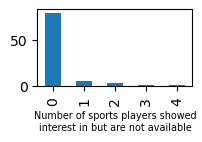

In [10]:
# df.plot.hist("num_sports_not_avail")
fig, ax = plt.subplots(figsize=(2, 1))
df["num_sports_not_avail"].value_counts().sort_index().plot.bar()
plt.xlabel("Number of sports players showed\ninterest in but are not available", size="x-small")
df[df["num_sports_not_avail"] > 0][["nickname", "num_sports_not_avail"] + [col for col in df.columns if "wants" in col or col in hf.SPORTS_LIST]]


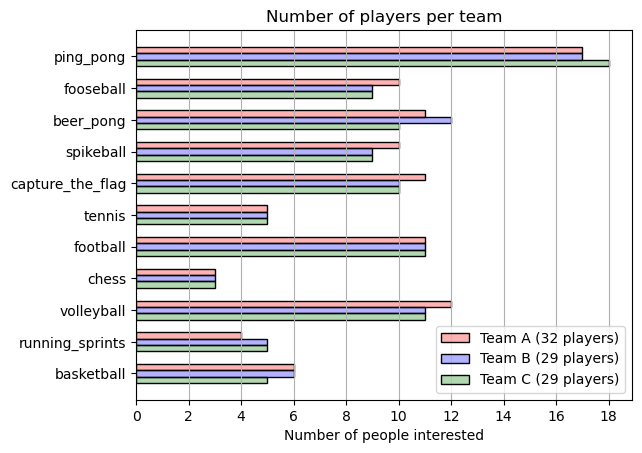

In [4]:
fig, ax = plt.subplots()
for team in hf.ALL_TEAMS:
    team.plot_sports_num()
ax.set_title("Number of players per team")
ax.legend();


In [23]:
from ipywidgets import HTML
all_players = pd.concat([team.player_df for team in hf.ALL_TEAMS])
text = ""
for colliding_pairs in [["volleyball", "basketball"],["volleyball", "running_sprints"], ["basketball", "running_sprints"]]: # ["football", "tennis"], ["capture_the_flag", "spikeball"]]:
    key_1, key_2 = f"subteam_{colliding_pairs[0]}", f"subteam_{colliding_pairs[1]}"
    sub_df = all_players[all_players[key_1].notna() & all_players[key_2].notna()]
    text += sub_df[["nickname", key_1, key_2]].to_html() + "<br>"
HTML(text)


HTML(value='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></…

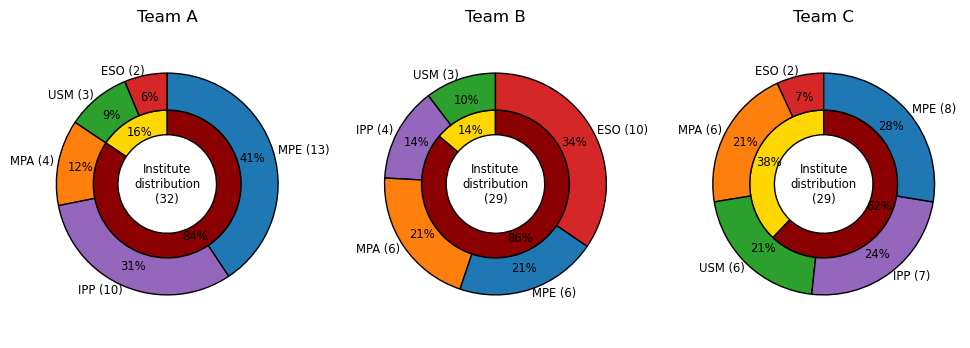

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, team in zip(axes, hf.ALL_TEAMS):
    plt.sca(ax)
    hf.create_institute_plot(team.player_df)
    ax.set_title(team.name)


In [21]:
teams[0].get_all_players_for_sport("chess")


,nickname,institute,is_postdoc,volleyball,running_sprints,basketball,chess,tennis,football,capture_the_flag,spikeball,beer_pong,ping_pong,foosball,num_sports,avail_monday,avail_tuesday,avail_thursday,avail_friday,late_entry
55,Clever Wombat,IPP,False,True,False,False,True,False,False,False,False,False,True,False,3,True,True,False,True,False
61,Trifling Tarpon,IPP,False,True,False,False,True,False,True,False,False,False,True,False,4,True,True,True,True,False
75,Awkward Cichlid,USM,False,False,False,False,True,False,True,False,True,False,True,False,4,True,True,True,True,False


## Make some plots

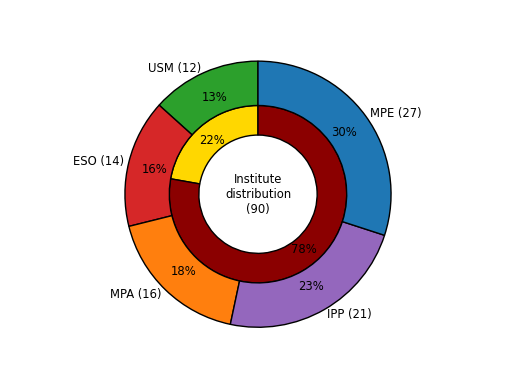

In [22]:
# Distribution of institutes
hf.create_institute_plot(df)


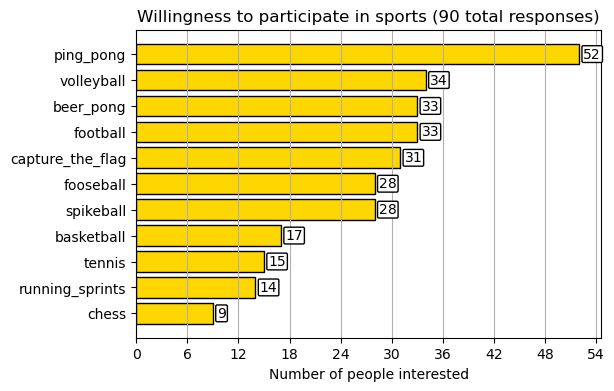

In [7]:
# Overall distribution of sports
fig, ax = plt.subplots(figsize=(6, 4))
hf.create_sports_num_plot(df, annotate_numbers=True, sort_bars=True)


### Open questions for meeting

- How to handle late entries?
- How to handle collisions in general?
- How to handle running/sprints? Shall I generate subteams for relay?
- How to handle capture the flag event?
- How to handle ping pong?
- How to handle times and people that cannot attend anymore?
- Review email text.

TODOs:

- Tabs for teams.
- Mention medical survice on the website.
- What to bring: team-colored T-shirt, sports clothes, water bottle.
- Mention late entries on the website.
- Put location warning in beginning.
- Send CSVs with the mapping along with the mail.
- Set up signal groups for each main team.
- Speak to Matteo, Juan and David.
- Running/sprints: minimum number of people: 4 per main team. First one-and-a-half hours reserved.